In [1]:
import numpy as np
import matplotlib.pyplot as plt

NumPy makes it easy to simulate all the distributions covered in Chapter 4. Let's explore each distribution with a practical example.

## 1. Normal distribution (Page 133 - Section 4.1)

Simulating the height of adult men in a population, where the mean height is 175 cm and the standard deviation is 10 cm.

In [2]:
mu = 175    # Mean height in cm
sigma = 10  # Standard deviation in cm

In [52]:
# This will sample a single individual
# from N(μ, σ)
# Run this cell multiple times
# How many trials does it take you to see someone 190 cm or taller? 2m or taller?
np.random.normal(mu, sigma)

193.215790232761

Text(0, 0.5, 'Frequency')

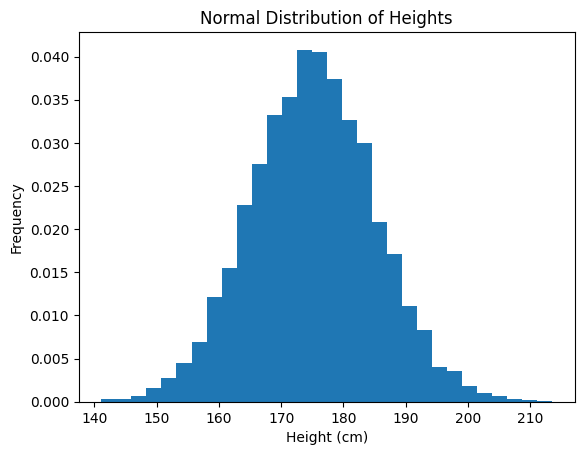

In [59]:
# Instead of sampling individuals one by one
# We can sample n people as follows
n = 10000 # Number of people

# Generate samples
heights = np.random.normal(mu, sigma, n)

# Plot
plt.hist(heights, bins=30, density=True)
plt.title('Normal Distribution of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

Calculate the percentage of individuals within 2 standard deviations of the mean and verify if it aligns with the 68-95-99.7 rule.

In [70]:
# YOUR CODE HERE
np.sum(((mu-2*sigma) < heights) & (heights < (mu+2*sigma))) / n *100

95.42

In [69]:
# Percentage of individuals within 2 sigma of the mean is expected to be 95%
np.sum(((mu-2*sigma) < heights) & (heights < (mu+2*sigma))) / n

0.9542

EXERCISE

Percentage of people shorter than 190 cm based on the simulation?

In [71]:
# YOUR CODE
100*np.sum(heights<190)/n

93.26

In [72]:
100*np.sum(heights < 190)/n

93.26

Let's answer the same question without the simulation. In section 4.1.3 Finding tail areas, there are 3 options described. Let's use the first option "The most common approach in practice is to use statistical software." with scipy.

Using scipy, you can easily convert a z-score into a percentile.

In [83]:
z = (190 - mu)/sigma
z

1.5

In [89]:
from scipy.stats import norm
percentile = norm.cdf(z) * 100
percentile

93.3192798731142

## 2. Geometric Distribution (Page 144 - Section 4.2)

The number of sales calls a salesperson needs to make to close their first deal, given that the probability of closing a deal on any given call is 0.1.

In [90]:
p = 0.1  # Probability of closing a deal on a single call

In [115]:
# Every time you run this cell,
# you simulate a salesperson making calls until they close a deal
# and return the number of calls made.
# The beauty of a simulation is that
# you don't need an actual salesperson to perform this experiment!
# RUN THIS CELL MULTIPLE TIMES

np.random.geometric(p)

11

Text(0, 0.5, 'Frequency')

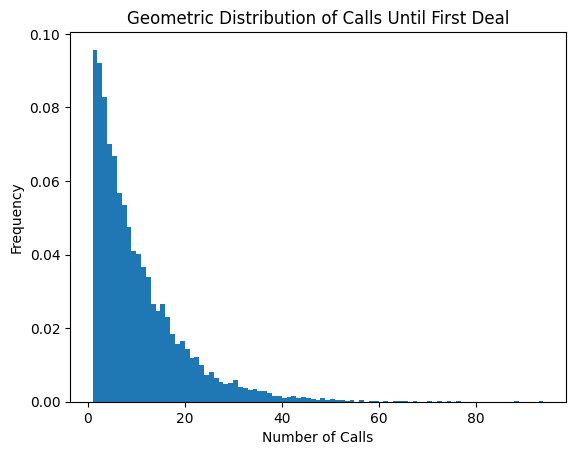

In [121]:
# Let's simulate 10000 salespeople, each with p=0.1
size = 10000 # Number of simulations

# Generate samples
calls_until_first_deal = np.random.geometric(p, size)

# Plot
plt.hist(calls_until_first_deal, bins=range(1, max(calls_until_first_deal)+1), density=True)
plt.title('Geometric Distribution of Calls Until First Deal')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')

In [122]:
# In page 146, the mean of a geometric distribution is given as 1/p
mean_equation = 1/p
mean_equation

10.0

In [128]:
# Let's verify if the result from our simulation is aligned with this formula
mean_simulation = np.mean(calls_until_first_deal)
mean_simulation

9.9662

EXERCISE

Calculate the standard deviation using the formula from page 146 and compare that with the standard deviation from the simulation.

In [130]:
# YOUR CODE HERE
stdev = np.sqrt((1-p)/p**2)
stdev

9.486832980505138

In [131]:
# SOLUTION
std_equation = np.sqrt((1-p)/p**2)
std_equation

9.486832980505138

In [134]:
std_simulation = np.std(calls_until_first_deal, ddof=1)
std_simulation

9.317185119651503

EXERCISE

Let's say we would like to know the probability of making 70 or more calls until first success, would it be appropriate to use the normal model? As you can clearly see, the geometric distribution is right skewed and can never be well-approximated by the normal model.

Use the simulation results to estimate the probability of making 70 or more calls until first success, when p=0.1.

In [135]:
# YOUR CODE HERE
100*np.sum(calls_until_first_deal >= 70)/size

0.09

In [136]:
# SOLUTION
100*np.sum(calls_until_first_deal >= 70)/size

0.09

Let's say someone made a mistake and calculated this probability using the normal assumption:

In [159]:
z = (70 - mean_equation)/std_equation
z

6.324555320336758

In [163]:
100 - (norm.cdf(z) * 100)

1.269813765247818e-08

As you can see, if one had assumed a normal distribution, the probability of needing 70 or more calls would have been nearly zero. However, our simulation shows that it is much larger (%0.05-0.09). While still small, it is not negligible.



The 2008 financial crisis is a prime example where models assuming normal distribution underestimated the risk of extreme events.

[Structural causes of the global financial crisis: a critical assessment of the ‘new financial architecture’](https://academic.oup.com/cje/article/33/4/563/1730705)

"There are four fundamental flaws in this mode of risk assessment. First...
Second, VAR models assume that security prices are generated by a normal
distribution. In a normal distribution the likelihood that an observation many standard
deviations beyond a 95% or even a 99% confidence interval will occur is infinitesimal. In
fact, security prices follow a distribution in which the preponderance of observations are
‘normal’, but every five to ten years observations occur that are so far from the mean that
they are virtually incompatible with the assumption of a normal distribution. Examples
of this well-known ‘fat tail’ phenomenon include the precipitous drop in stock prices that
took place in August 1987, the global crisis brought on by the collapse of the giant hedge
fund Long Term Capital Management, the Asian crisis and the recent global stock
market and CDO crash. In August 2007, two large hedge funds managed by Goldman
Sachs collapsed, forcing Goldman to inject $3 billion into the funds. To explain why
Goldman should not be held responsible for their collapse, chief financial officer David
Viniar said ‘We were seeing things that were 25 standard deviation moves, several days in
a row’ (Financial Times, 2007B, p. 25). The Director for Financial Stability of the Bank of
England noted that, under a normal distribution, ‘a 25-sigma event would be expected to
occur once every $6x10^{124}$ lives of the universe’ adding, tongue-in-cheek, that when he
tried to calculate the probability of such an event occurring several days in a row, ‘the lights
visibly dimmed over London’. Even a 7.3 standard deviation event should occur only once
every 13 billion years (Haldane, 2009, p. 2). Allowing banks to estimate risk and set capital
requirements on the assumption that large losses cannot happen left them vulnerable when
the crisis erupted."

so be careful with your assumptions :)

You can test for normality:

In [166]:
from scipy.stats import normaltest
normaltest(calls_until_first_deal)

NormaltestResult(statistic=4218.746023578224, pvalue=0.0)

Read the documentation for the interpretation:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

There are other ways to test for normality:
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/


## 3. Binomial distribution (Page 149 - Section 4.3)

Simulating the probability of getting k heads in 100 coin flips, where the coin is fair.

Text(0, 0.5, 'Frequency')

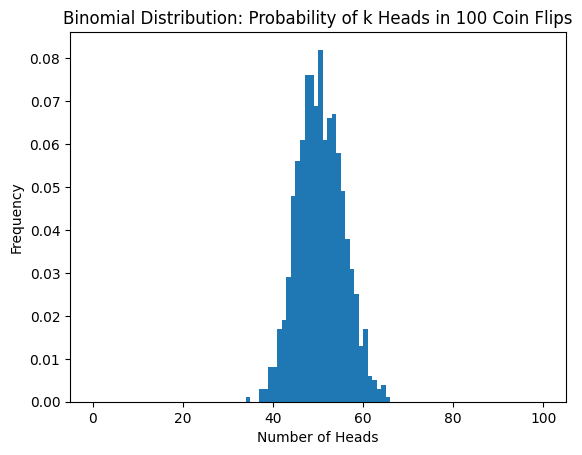

In [168]:
# Parameters
n = 100    # Number of coin flips
p = 0.5    # Probability of heads
size = 1000 # Number of samples

# Generate samples
heads = np.random.binomial(n, p, size)

# Plot
plt.hist(heads, bins=range(101), density=True)
plt.title('Binomial Distribution: Probability of k Heads in 100 Coin Flips')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')

EXERCISE

Probability of observing 50 heads in 100 coin flips? Solution available below.

In [171]:
# YOUR CODE HERE
import math
n=100
k=50
math.comb(n, k)

100891344545564193334812497256

The formula for the calculation involves calculating ${n\choose k}$ (see page 150). This is called a [combination](https://en.wikipedia.org/wiki/Combination) in mathematics. The math module from the the Python Standard Library can calculate n choose k easily:

In [172]:
import math
n = 100
k = 50
math.comb(n, k)

100891344545564193334812497256

In [175]:
# Page 150
p = 0.5
100 * math.comb(n, k) * (p**k) * ((1-p)**(n-k))
# You need to be able to convert a mathematical formula into code easily
# Practice this as much as possible

7.958923738717876

EXERCISE

What is the expected number of heads?

In [176]:
# YOUR CODE HERE
mu = n*p
mu

50.0

In [177]:
# Page 150
mu = n*p
mu

50.0

so we expect 50 heads from 100 fair coin flips, but the probability of that happening is %7.96.

Remember the beginning of Chapter 1 (Page 10):

> Suppose you flip a coin 100 times. While the chance a coin lands heads in any given coin flip is 50%, we probably won’t observe exactly 50 heads. This type of fluctuation is part of almost 
any type of data generating process.



## 4. Negative Binomial Distribution (Page 158 - Section 4.4)

Simulating the number of days until a manufacturing plant produces $k=5$ defective items, given that the probability of producing a defective item on any given day is $p=0.05$.

Text(0, 0.5, 'Frequency')

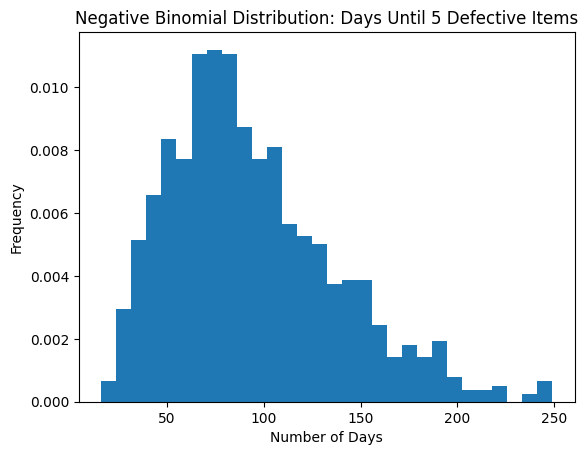

In [180]:
# Parameters
k = 5    # Number of defective items
p = 0.05  # Probability of producing a defective item on a given day
size = 1000 # Number of samples

# Generate samples
days_until_5_defects = np.random.negative_binomial(k, p, size)

# Plot
plt.hist(days_until_5_defects, bins=30, density=True)
plt.title('Negative Binomial Distribution: Days Until 5 Defective Items')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')

## 5. Poisson distribution (Page 163 - Section 4.5)

Simulating the number of cars ($k$) passing through a toll booth in one hour, where the average rate is $λ=5$ cars per hour.



Text(0, 0.5, 'Frequency')

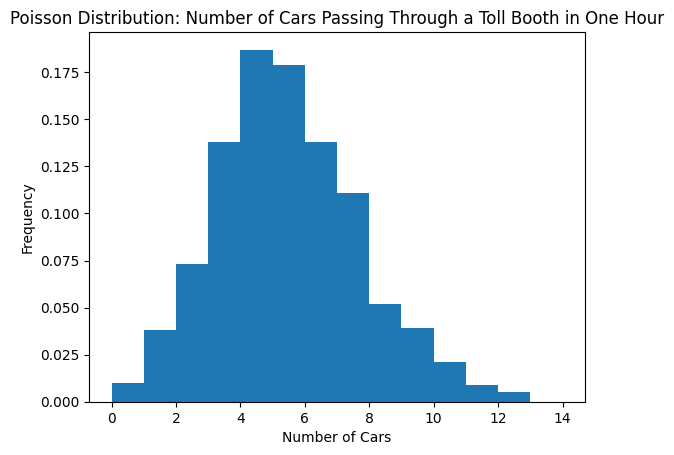

In [181]:
# Parameters
rate = 5   # λ
size = 1000 # Number of simulations

# Generate samples
cars_per_hour = np.random.poisson(rate, size)

# Plot
plt.hist(cars_per_hour, bins=range(0, 15), density=True)
plt.title('Poisson Distribution: Number of Cars Passing Through a Toll Booth in One Hour')
plt.xlabel('Number of Cars')
plt.ylabel('Frequency')

EXERCISE

Calculate the probability of $k=2$ using the formula:

$P(k) = \frac{\lambda^k e^{-\lambda}}{k!}$

Solution available.

In [182]:
rate = 5
k = 2
# YOUR CODE HERE
p = rate**k*math.exp(-rate)/math.factorial(k)
p

0.08422433748856833

In [183]:
rate**k * math.exp(-rate) / math.factorial(k)

0.08422433748856833